<a href="https://colab.research.google.com/github/karpnv/speech-tech-mipt/blob/main/week04/aec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt install sox
# !wget wavs from github

!wget -q https://raw.githubusercontent.com/karpnv/speech-tech-mipt/main/week04/salut.wav
!wget -q https://raw.githubusercontent.com/karpnv/speech-tech-mipt/main/week04/aec_mic.wav
!wget -q https://raw.githubusercontent.com/karpnv/speech-tech-mipt/main/week04/aec_spk.wav
!wget -q https://raw.githubusercontent.com/karpnv/speech-tech-mipt/main/week04/aec.wav

Reading package lists... Done
Building dependency tree       
Reading state information... Done
sox is already the newest version (14.4.2-3ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [3]:
import random
import librosa
import IPython.display as ipd
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plot

from scipy.io import wavfile

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [5]:
# Plot the signal read from wav file
def show_spectrogram(wav_path):

    # Read the wav file (mono)
    samplingFrequency, signalData = wavfile.read(wav_path)

    plot.subplot(211)
    plot.title('Spectrogram of a wav file')

    plot.plot(signalData)
    plot.xlabel('Sample')
    plot.ylabel('Amplitude') 

    plot.subplot(212)
    plot.specgram(signalData,Fs=samplingFrequency)
    plot.xlabel('Time')
    plot.ylabel('Frequency')

    plot.show()
    return ipd.Audio(wav_path)

# Sound analysis basics

Now we have some audio files. Let's take a look

In [ ]:
show_spectrogram('salut.wav')

In [ ]:
!sox --info salut.wav

With sox tool, we can perform various manipulations with the sound. For example, we can do resample

In [8]:
!sox salut.wav -r 8000 salut_8000.wav

In [ ]:
show_spectrogram('salut_8000.wav')

In [10]:
!sox --info salut.wav


Input File     : 'salut.wav'
Channels       : 1
Sample Rate    : 16000
Precision      : 16-bit
Duration       : 00:00:02.88 = 46080 samples ~ 216 CDDA sectors
File Size      : 92.2k
Bit Rate       : 256k
Sample Encoding: 16-bit Signed Integer PCM



In [11]:
!sox salut.wav -r 8000 salut_8000.wav

In [12]:
ipd.Audio('salut_8000.wav')

In [13]:
!sox --info aec_mic.wav


Input File     : 'aec_mic.wav'
Channels       : 6
Sample Rate    : 16000
Precision      : 25-bit
Duration       : 00:00:07.00 = 112000 samples ~ 525 CDDA sectors
File Size      : 2.69M
Bit Rate       : 3.07M
Sample Encoding: 32-bit Floating Point PCM



# Acoustic Echo Cancellation

Let's try to make our own AEC!

We will use Least Mean Squares algorithm for that.

First, we should prepare audio files. AEC algorithms needs two signals:
* d - microphone signal
* x - reference (or speaker) signal

In [14]:
!sox aec_mic.wav aec_1ch_mic.wav remix 1
!soxi aec_1ch_mic.wav


Input File     : 'aec_1ch_mic.wav'
Channels       : 1
Sample Rate    : 16000
Precision      : 25-bit
Duration       : 00:00:07.00 = 112000 samples ~ 525 CDDA sectors
File Size      : 448k
Bit Rate       : 512k
Sample Encoding: 32-bit Floating Point PCM



In [ ]:
show_spectrogram('aec_1ch_mic.wav')

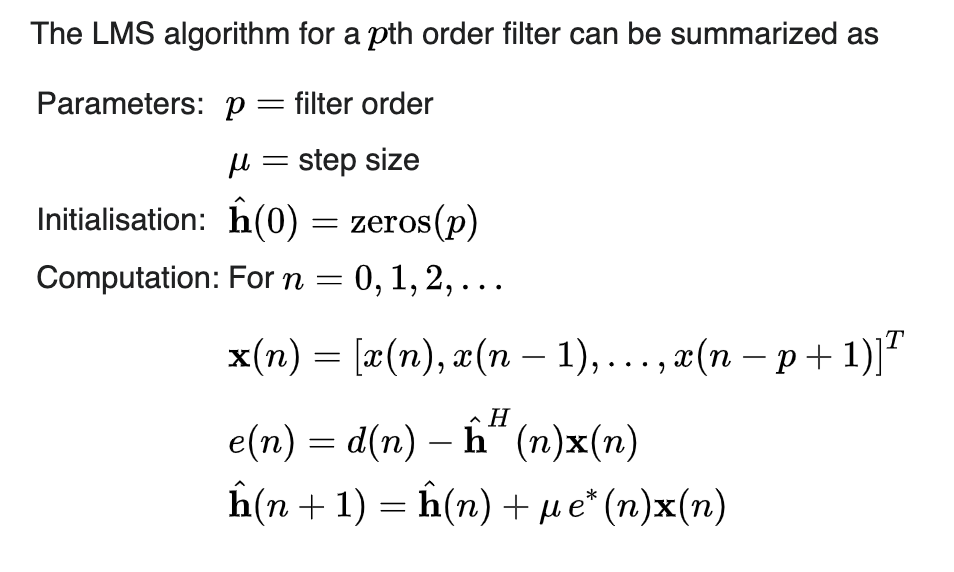

In [94]:
def lms(mic_signal: np.ndarray, spk_signal: np.ndarray) -> np.ndarray:
    """
    :param mic_signal: numpy array of microphone signal
    :param spk_signal: numpy array of speaker or reference signal
    :return: function return filtered sound (numpy array)
    """
    x = spk_signal
    d = mic_signal

    window_size = 500
    h = np.zeros(window_size)
    e = np.zeros(len(x) - window_size + 1)

    for i in range(window_size - 1, len(x)):
        # TODO: you need to write this
    # TODO: what should we return here?

In [95]:
sample_rate = 16000
mic_signal, _ = librosa.load('aec_mic.wav', sample_rate)
spk_signal, _ = librosa.load('aec_spk.wav', sample_rate)
print('mic_signal.shape:', mic_signal.shape)
print('spk_signal.shape:', spk_signal.shape)

mic_signal.shape: (112000,)
spk_signal.shape: (112000,)


In [96]:
out_signal = lms(mic_signal, spk_signal)
print('out_signal.shape:', out_signal.shape)

out_signal.shape: (111501,)


In [ ]:
with sf.SoundFile(file='out.wav', samplerate=16000, channels=1, mode='w') as audio_file:
    audio_file.write(out_signal)

show_spectrogram('out.wav')

In [ ]:
show_spectrogram('aec.wav')

In [66]:
!soxi out.wav


Input File     : 'out.wav'
Channels       : 1
Sample Rate    : 16000
Precision      : 16-bit
Duration       : 00:00:06.97 = 111501 samples ~ 522.661 CDDA sectors
File Size      : 223k
Bit Rate       : 256k
Sample Encoding: 16-bit Signed Integer PCM

